In [ ]:
# 1. Import thư viện cần thiết
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def getRawData(token_id):
  raw_data_file=f"{tokens[token_id]}.csv"
  df = pd.read_csv(data_path + raw_data_file,  index_col="Date")
  colsFeature = ["Price"]
  df_target = df[colsFeature]
  return df, df_target

#Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# 2. Đọc file csv và gắng index với giá Close
tokens = ["BIDV_BID", "FPT", "VCG"]

prj_path = "/content/drive/My Drive/BDA_report/"
data_path = os.path.join(prj_path, "data/")


# BIDV

7:3

In [ ]:
df, df1 = getRawData(0)

In [ ]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [ ]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
16/16 [==============================] - 3s 32ms/step - loss: 0.0380
Epoch 2/100
16/16 [==============================] - 0s 31ms/step - loss: 0.0024
Epoch 3/100
16/16 [==============================] - 1s 36ms/step - loss: 0.0014
Epoch 4/100
16/16 [==============================] - 0s 29ms/step - loss: 0.0011
Epoch 5/100
16/16 [==============================] - 0s 28ms/step - loss: 9.8030e-04
Epoch 6/100
16/16 [==============================] - 0s 24ms/step - loss: 9.1034e-04
Epoch 7/100
16/16 [==============================] - 0s 27ms/step - loss: 8.7042e-04
Epoch 8/100
16/16 [==============================] - 0s 28ms/step - loss: 8.1824e-04
Epoch 9/100
16/16 [==============================] - 1s 32ms/step - loss: 7.9257e-04
Epoch 10/100
16/16 [==============================] - 0s 30ms/step - loss: 7.7487e-04
Epoch 11/100
16/16 [==============================] - 0s 25ms/step - loss: 7.5049e-04
Epoch 12/100
16/16 [==============================] - 0s 22ms/step - loss: 7.37

In [ ]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)


12/12 [==============================] - 0s 4ms/step


In [ ]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)


In [ ]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape= mean_absolute_percentage_error(y_pred,ytest)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing RMSE: 39633.10101992516
Testing MAPE: 0.9999811127768432


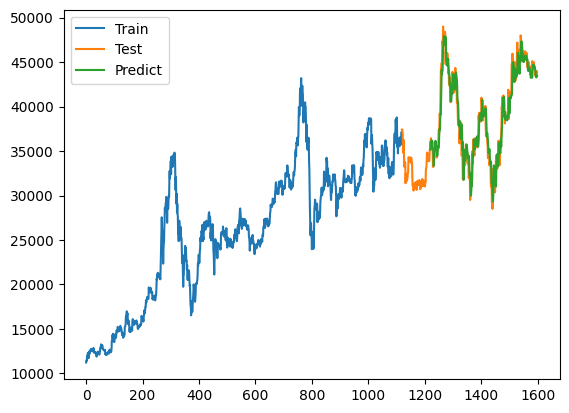

In [ ]:
# 14.Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))


plt.legend(['Train','Test','Predict'])
plt.show()

8:2

In [ ]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [ ]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 1s 13ms/step - loss: 0.0077
Epoch 2/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0013
Epoch 3/100
19/19 [==============================] - 0s 13ms/step - loss: 7.5450e-04
Epoch 4/100
19/19 [==============================] - 0s 12ms/step - loss: 6.8271e-04
Epoch 5/100
19/19 [==============================] - 0s 12ms/step - loss: 6.0275e-04
Epoch 6/100
19/19 [==============================] - 0s 12ms/step - loss: 5.8225e-04
Epoch 7/100
19/19 [==============================] - 0s 12ms/step - loss: 5.5134e-04
Epoch 8/100
19/19 [==============================] - 0s 12ms/step - loss: 5.2099e-04
Epoch 9/100
19/19 [==============================] - 0s 11ms/step - loss: 5.2092e-04
Epoch 10/100
19/19 [==============================] - 0s 13ms/step - loss: 4.8720e-04
Epoch 11/100
19/19 [==============================] - 0s 11ms/step - loss: 5.2077e-04
Epoch 12/100
19/19 [==============================] - 0s 11ms/step - lo

In [ ]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)


7/7 [==============================] - 0s 4ms/step


In [ ]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)


In [ ]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape= mean_absolute_percentage_error(y_pred,ytest)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing RMSE: 0.17765245736665386
Testing MAPE: 0.024751269712127606


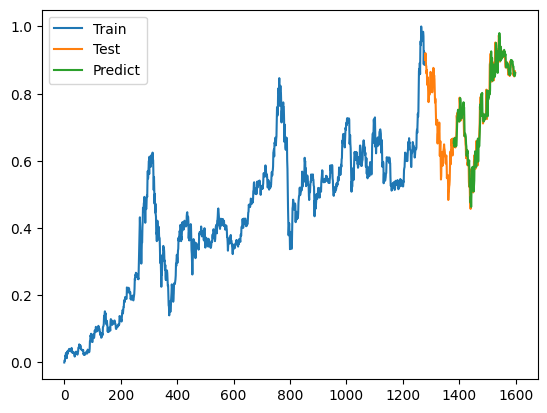

In [ ]:
# 14.Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))


plt.legend(['Train','Test','Predict'])
plt.show()

7.5:2.5

In [ ]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
# 4. Chia train test
train_size = int(0.75 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [ ]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
18/18 [==============================] - 1s 12ms/step - loss: 0.0124
Epoch 2/100
18/18 [==============================] - 0s 13ms/step - loss: 0.0021
Epoch 3/100
18/18 [==============================] - 0s 12ms/step - loss: 0.0013
Epoch 4/100
18/18 [==============================] - 0s 14ms/step - loss: 0.0010
Epoch 5/100
18/18 [==============================] - 0s 11ms/step - loss: 9.0038e-04
Epoch 6/100
18/18 [==============================] - 0s 12ms/step - loss: 8.7833e-04
Epoch 7/100
18/18 [==============================] - 0s 12ms/step - loss: 7.8807e-04
Epoch 8/100
18/18 [==============================] - 0s 13ms/step - loss: 7.8769e-04
Epoch 9/100
18/18 [==============================] - 0s 12ms/step - loss: 7.2565e-04
Epoch 10/100
18/18 [==============================] - 0s 13ms/step - loss: 6.9916e-04
Epoch 11/100
18/18 [==============================] - 0s 11ms/step - loss: 6.8309e-04
Epoch 12/100
18/18 [==============================] - 0s 12ms/step - loss: 6.80

In [ ]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)


10/10 [==============================] - 0s 3ms/step


In [ ]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)


In [ ]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape= mean_absolute_percentage_error(y_pred,ytest)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing RMSE: 0.17683330006771103
Testing MAPE: 0.03701466596612986


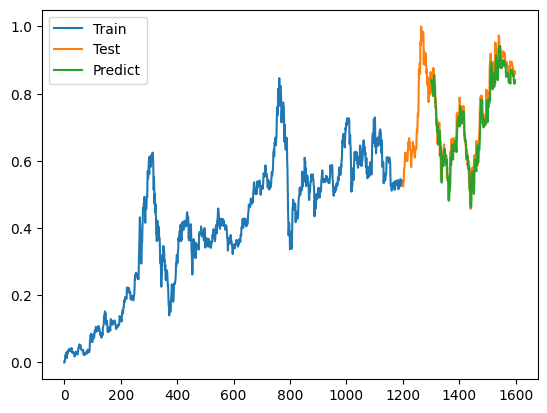

In [ ]:
# 14.Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))


plt.legend(['Train','Test','Predict'])
plt.show()

# FPT

7:3

In [ ]:
df, df1 = getRawData(1)

In [ ]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [ ]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 1s 12ms/step - loss: 0.0164
Epoch 2/100
17/17 [==============================] - 0s 13ms/step - loss: 0.0015
Epoch 3/100
17/17 [==============================] - 0s 13ms/step - loss: 3.9568e-04
Epoch 4/100
17/17 [==============================] - 0s 11ms/step - loss: 3.0447e-04
Epoch 5/100
17/17 [==============================] - 0s 12ms/step - loss: 2.8003e-04
Epoch 6/100
17/17 [==============================] - 0s 12ms/step - loss: 3.1659e-04
Epoch 7/100
17/17 [==============================] - 0s 11ms/step - loss: 2.6903e-04
Epoch 8/100
17/17 [==============================] - 0s 12ms/step - loss: 5.5522e-04
Epoch 9/100
17/17 [==============================] - 0s 12ms/step - loss: 2.6868e-04
Epoch 10/100
17/17 [==============================] - 0s 11ms/step - loss: 2.2914e-04
Epoch 11/100
17/17 [==============================] - 0s 13ms/step - loss: 2.2072e-04
Epoch 12/100
17/17 [==============================] - 0s 12ms/step - lo

In [ ]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)


12/12 [==============================] - 0s 4ms/step


In [ ]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)


In [ ]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape= mean_absolute_percentage_error(y_pred,ytest)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing RMSE: 79186.18646577817
Testing MAPE: 0.9999897893486447


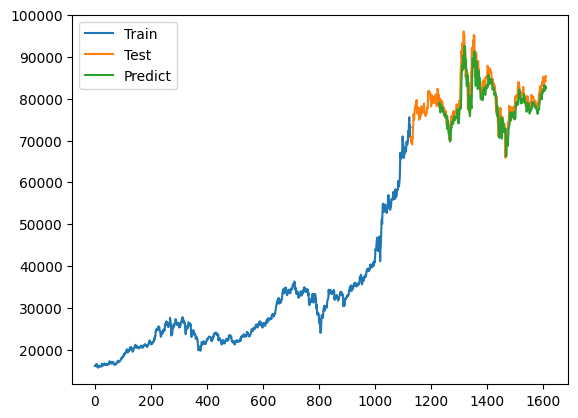

In [ ]:
# 14.Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))


plt.legend(['Train','Test','Predict'])
plt.show()

8:2

In [ ]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [ ]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 1s 13ms/step - loss: 0.0139
Epoch 2/100
19/19 [==============================] - 0s 12ms/step - loss: 5.1733e-04
Epoch 3/100
19/19 [==============================] - 0s 13ms/step - loss: 3.6879e-04
Epoch 4/100
19/19 [==============================] - 0s 12ms/step - loss: 3.3585e-04
Epoch 5/100
19/19 [==============================] - 0s 13ms/step - loss: 3.2202e-04
Epoch 6/100
19/19 [==============================] - 0s 13ms/step - loss: 2.9879e-04
Epoch 7/100
19/19 [==============================] - 0s 12ms/step - loss: 2.9692e-04
Epoch 8/100
19/19 [==============================] - 0s 11ms/step - loss: 2.8045e-04
Epoch 9/100
19/19 [==============================] - 1s 29ms/step - loss: 2.7492e-04
Epoch 10/100
19/19 [==============================] - 0s 15ms/step - loss: 2.5539e-04
Epoch 11/100
19/19 [==============================] - 0s 11ms/step - loss: 2.5391e-04
Epoch 12/100
19/19 [==============================] - 0s 13ms/step 

In [ ]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)


7/7 [==============================] - 0s 4ms/step


In [ ]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)


In [ ]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape= mean_absolute_percentage_error(y_pred,ytest)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing RMSE: 0.07156341714326014
Testing MAPE: 0.015071457575256004


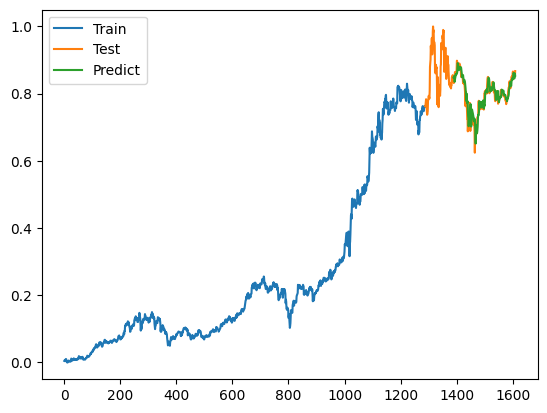

In [ ]:
# 14.Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))


plt.legend(['Train','Test','Predict'])
plt.show()

7.5:2.5

In [ ]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
# 4. Chia train test
train_size = int(0.75 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [ ]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
18/18 [==============================] - 1s 13ms/step - loss: 0.0333
Epoch 2/100
18/18 [==============================] - 0s 12ms/step - loss: 0.0011
Epoch 3/100
18/18 [==============================] - 0s 11ms/step - loss: 4.2776e-04
Epoch 4/100
18/18 [==============================] - 0s 12ms/step - loss: 3.8369e-04
Epoch 5/100
18/18 [==============================] - 0s 12ms/step - loss: 3.2516e-04
Epoch 6/100
18/18 [==============================] - 0s 12ms/step - loss: 2.9924e-04
Epoch 7/100
18/18 [==============================] - 0s 11ms/step - loss: 2.7005e-04
Epoch 8/100
18/18 [==============================] - 0s 11ms/step - loss: 2.5433e-04
Epoch 9/100
18/18 [==============================] - 0s 12ms/step - loss: 2.3889e-04
Epoch 10/100
18/18 [==============================] - 0s 11ms/step - loss: 2.2657e-04
Epoch 11/100
18/18 [==============================] - 0s 11ms/step - loss: 2.1689e-04
Epoch 12/100
18/18 [==============================] - 0s 11ms/step - lo

In [ ]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)


10/10 [==============================] - 0s 4ms/step


In [ ]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)


In [ ]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape= mean_absolute_percentage_error(y_pred,ytest)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing RMSE: 0.08952046981177446
Testing MAPE: 0.021770097925939622


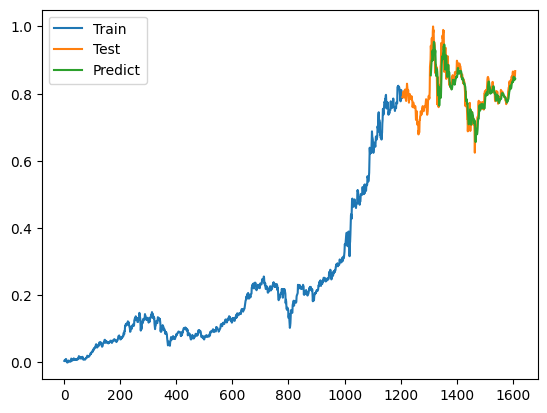

In [ ]:
# 14.Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))


plt.legend(['Train','Test','Predict'])
plt.show()

# VCG

7:3

In [ ]:
df, df1 = getRawData(2)

In [ ]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [ ]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
16/16 [==============================] - 1s 12ms/step - loss: 0.0156
Epoch 2/100
16/16 [==============================] - 0s 12ms/step - loss: 0.0011
Epoch 3/100
16/16 [==============================] - 0s 20ms/step - loss: 5.8192e-04
Epoch 4/100
16/16 [==============================] - 0s 19ms/step - loss: 4.1862e-04
Epoch 5/100
16/16 [==============================] - 0s 20ms/step - loss: 3.5930e-04
Epoch 6/100
16/16 [==============================] - 0s 21ms/step - loss: 3.2860e-04
Epoch 7/100
16/16 [==============================] - 0s 20ms/step - loss: 3.0938e-04
Epoch 8/100
16/16 [==============================] - 0s 21ms/step - loss: 2.8462e-04
Epoch 9/100
16/16 [==============================] - 0s 21ms/step - loss: 2.7156e-04
Epoch 10/100
16/16 [==============================] - 0s 21ms/step - loss: 2.5548e-04
Epoch 11/100
16/16 [==============================] - 0s 21ms/step - loss: 2.4313e-04
Epoch 12/100
16/16 [==============================] - 0s 16ms/step - lo

In [ ]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)


12/12 [==============================] - 0s 4ms/step


In [ ]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)


In [ ]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape= mean_absolute_percentage_error(y_pred,ytest)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing RMSE: 26281.19658539227
Testing MAPE: 0.9999847794123149


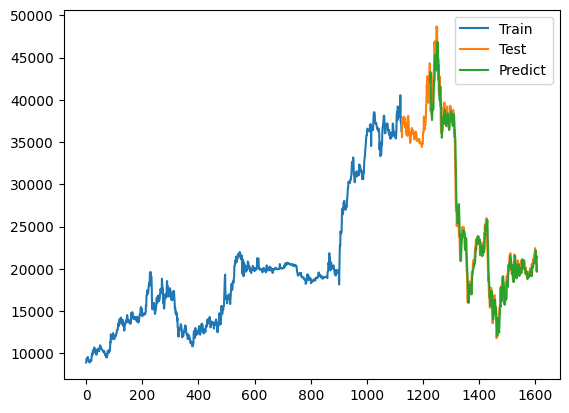

In [ ]:
# 14.Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))


plt.legend(['Train','Test','Predict'])
plt.show()

8:2

In [ ]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [ ]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 1s 13ms/step - loss: 0.0184
Epoch 2/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0012
Epoch 3/100
19/19 [==============================] - 0s 12ms/step - loss: 5.7176e-04
Epoch 4/100
19/19 [==============================] - 0s 13ms/step - loss: 4.1392e-04
Epoch 5/100
19/19 [==============================] - 0s 14ms/step - loss: 3.7681e-04
Epoch 6/100
19/19 [==============================] - 0s 12ms/step - loss: 3.6924e-04
Epoch 7/100
19/19 [==============================] - 0s 13ms/step - loss: 3.5489e-04
Epoch 8/100
19/19 [==============================] - 0s 12ms/step - loss: 3.5181e-04
Epoch 9/100
19/19 [==============================] - 0s 12ms/step - loss: 3.5014e-04
Epoch 10/100
19/19 [==============================] - 0s 15ms/step - loss: 3.5132e-04
Epoch 11/100
19/19 [==============================] - 0s 20ms/step - loss: 3.2977e-04
Epoch 12/100
19/19 [==============================] - 0s 20ms/step - lo

In [ ]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)


7/7 [==============================] - 0s 4ms/step


In [ ]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)


In [ ]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape= mean_absolute_percentage_error(y_pred,ytest)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing RMSE: 0.10355358453157402
Testing MAPE: 0.071014583038221


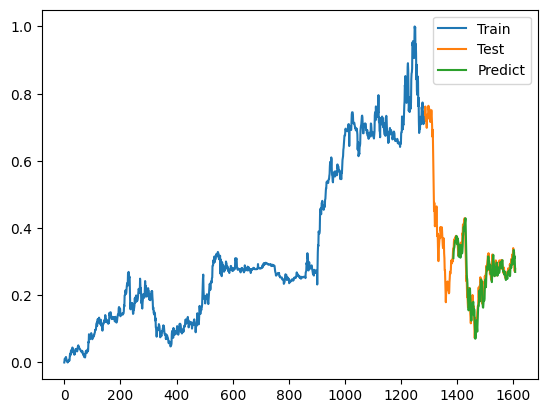

In [ ]:
# 14.Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))


plt.legend(['Train','Test','Predict'])
plt.show()

7.5:2.5

In [ ]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
# 4. Chia train test
train_size = int(0.75 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [ ]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
18/18 [==============================] - 1s 12ms/step - loss: 0.0274
Epoch 2/100
18/18 [==============================] - 0s 20ms/step - loss: 6.4930e-04
Epoch 3/100
18/18 [==============================] - 0s 20ms/step - loss: 4.5521e-04
Epoch 4/100
18/18 [==============================] - 0s 19ms/step - loss: 3.9697e-04
Epoch 5/100
18/18 [==============================] - 0s 21ms/step - loss: 3.7402e-04
Epoch 6/100
18/18 [==============================] - 0s 19ms/step - loss: 3.5265e-04
Epoch 7/100
18/18 [==============================] - 0s 20ms/step - loss: 3.4010e-04
Epoch 8/100
18/18 [==============================] - 0s 19ms/step - loss: 3.1522e-04
Epoch 9/100
18/18 [==============================] - 0s 21ms/step - loss: 3.0053e-04
Epoch 10/100
18/18 [==============================] - 0s 20ms/step - loss: 2.8900e-04
Epoch 11/100
18/18 [==============================] - 0s 12ms/step - loss: 2.8239e-04
Epoch 12/100
18/18 [==============================] - 0s 12ms/step 

In [ ]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)


10/10 [==============================] - 0s 4ms/step


In [ ]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)


In [ ]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape= mean_absolute_percentage_error(y_pred,ytest)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing RMSE: 0.15761971801816524
Testing MAPE: 0.06473896286865649


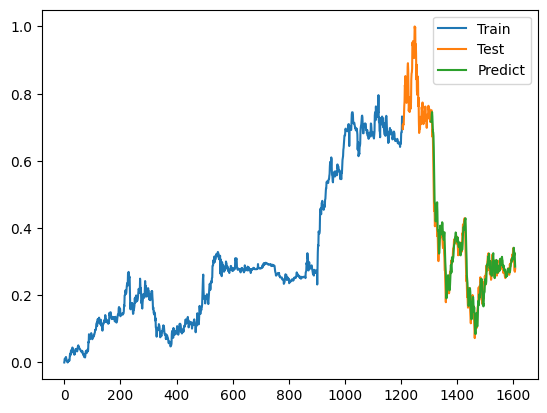

In [ ]:
# 14.Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))


plt.legend(['Train','Test','Predict'])
plt.show()